# 算法原理

LLE首先假设数据在较小的局部是线性的，也就是说，某一个数据可以由它邻域中的几个样本来线性表示。比如我们有一个样本$x_1$,我们在它的原始高维邻域里用K-近邻思想找到和它最近的三个样本$x_2,x_3,x_4$. 然后我们假设$x_1$可以由$x_2,x_3,x_4$线性表示，即：$$x_1 = w_{12}x_2 + w_{13}x_3 +w_{14}x_4$$

其中，$w_{12}， w_{13}， w_{14}$为权重系数。在我们通过LLE降维后，我们希望$x_1$在低维空间对应的投影$x_1'$和$x_2,x_3,x_4$对应的投影$x_2',x_3',x_4'$也尽量保持同样的线性关系，即$$x_1' \approx w_{12}x_2' + w_{13}x_3' +w_{14}x_4'$$


也就是说，投影前后线性关系的权重系数$w_{12}， w_{13}， w_{14}$是尽量不变或者最小改变的。

从上面可以看出，线性关系只在样本的附近起作用，离样本远的样本对局部的线性关系没有影响，因此降维的复杂度降低了很多。


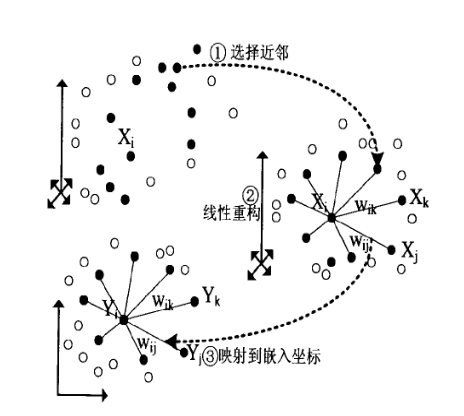

从图中可以看出，LLE算法主要分为三步，第一步是求K近邻的过程，这个过程使用了和KNN算法一样的求最近邻的方法。第二步，就是对每个样本求它在邻域里的K个近邻的线性关系，得到线性关系权重系数W。第三步就是利用权重系数来在低维里重构样本数据。

具体过程如下：  
输入：样本集$D=\{x_1,x_2,...,x_m\}$, 最近邻数k，降维到的维数d  
输出： 低维样本集矩阵$D'$  
1) for i 1 to m, &nbsp;按欧式距离作为度量，计算和$x_i$最近的的k个最近邻$(x_{i1}, x_{i2}, ...,x_{ik},)$
2) for i 1 to m,&nbsp;求出局部协方差矩阵$Z_i=(x_i-x_j)(x_i-x_j)^T$,并求出对应的权重系数向量:$$W_i = \frac{Z_i^{-1}1_k}{1_k^TZ_i^{-1}1_k}$$
3) 由权重系数向量$W_i$组成权重系数矩阵$W$,计算矩阵$M=(I-W)(I-W)^T$
4) 计算矩阵M的前d+1个特征值，并计算这d+1个特征值对应的特征向量$\{y_1,y_2,...y_{d+1}\}$。
5) 由第二个特征向量到第d+1个特征向量所张成的矩阵即为输出低维样本集矩阵$D' = (y_2,y_3,...y_{d+1})$　

LLE算法的主要优点有：

1）可以学习任意维的局部线性的低维流形

2）算法归结为稀疏矩阵特征分解，计算复杂度相对较小，实现容易。

LLE算法的主要缺点有：

1）算法所学习的流形只能是不闭合的，且样本集是稠密均匀的。

2）算法对最近邻样本数的选择敏感，不同的最近邻数对最后的降维结果有很大影响。

# 数据准备

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
#读取数据
data = pd.read_csv("../data/breast_cancer.csv")
print(data.head())

       0      1       2       3        4        5       6        7       8  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

         9  ...     21      22      23      24      25      26      27  \
0  0.07871  ...  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  label  
0  0.4601  0.11890      0  
1  0.2750  0.08902      0  
2 

In [5]:
#准备数据
data = data.dropna()
y = data['label']
x = data.drop(['label'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

# 模型训练

In [6]:
model = LocallyLinearEmbedding(n_components=3, n_neighbors=5, random_state=0)
model.fit(x_train)
model.embedding_.shape # 流形嵌入

(426, 3)

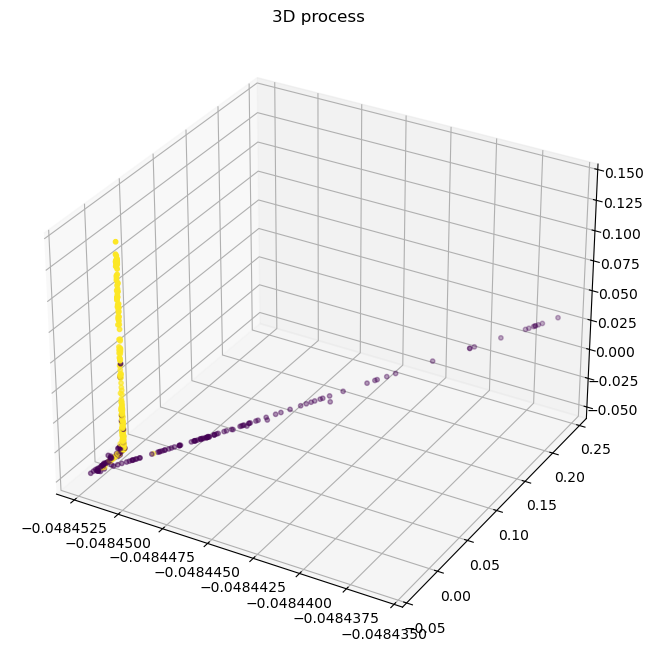

In [7]:
# 绘制三维效果图
model = LocallyLinearEmbedding(n_components=3, n_neighbors=5, random_state=0)
model.fit(x_train)
x_new = model.transform(x_train)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_title('3D process')
ax.scatter(x_new[:,0], x_new[:,1], x_new[:,2] , c=y_train, s=10)

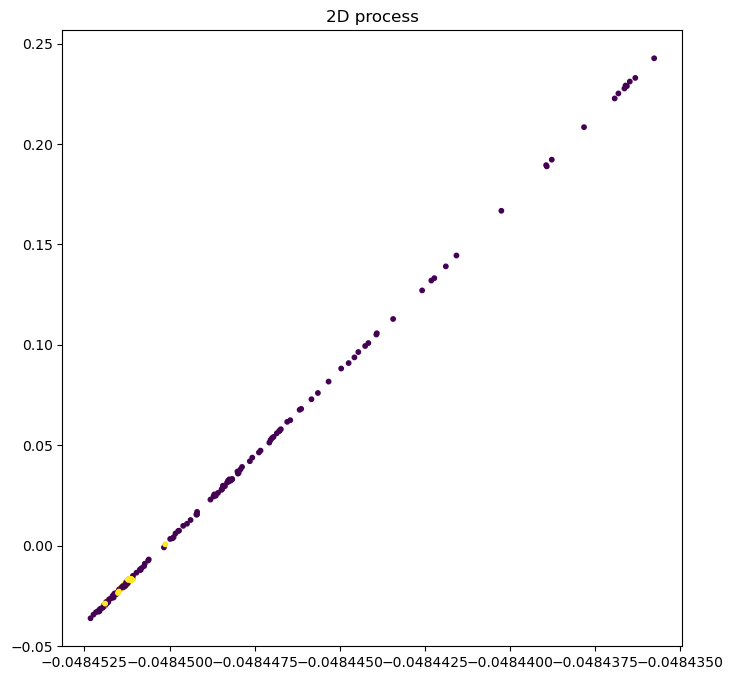

In [8]:
# 绘制二维效果图
model = LocallyLinearEmbedding(n_components=2, n_neighbors=5, random_state=0)
model.fit(x_train)
x_new = model.transform(x_train)
plt.figure(figsize=(8, 8))
plt.title('2D process')
plt.scatter(x_new[:,0], x_new[:,1], c=y_train, s=10)

# 模型保存

In [9]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../outputs/best_models/lle.pkl')

# 加载模型
model = joblib.load('../outputs/best_models/lle.pkl')

In [10]:
# 法二
import pickle

with open('../outputs/best_models/lle.pkl', 'wb') as f:
    pickle.dump(model, f)

#读取Model
with open('../outputs/best_models/lle.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [11]:
# 转换数据
x_new = model.transform(x_train)

In [12]:
x_new.shape

(426, 2)

# 模型应用

In [13]:
# 先对数据降维，再进行分类
lle = LocallyLinearEmbedding(n_components=10, n_neighbors=5, random_state=0)
lle.fit(x_train)
x_new = lle.transform(x_train)

# 分类模型
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [2, 3, 4]}

#GridSearchCV优化参数、训练模型
gsearch = GridSearchCV(knn, param_grid)
knn = gsearch.fit(x_new, y_train)

#打印最优结果
print('KNN params:', knn.best_estimator_)

KNN params: KNeighborsClassifier(n_neighbors=3)


In [14]:
x_new = lle.transform(x_test)
prediction = knn.predict(x_new)

In [15]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 0.9440559440559441


In [16]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        54
           1       0.96      0.96      0.96        89

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

